In [2]:
import pandas as pd
import numpy as np

# tf-idf
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# word2vec
from gensim.models.word2vec import Word2Vec
from gensim.models.word2vec import LineSentence

# scatter plot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 解决matplotlib以及seaborn中文字方块的问题
from pylab import mpl
import seaborn as sns

# 3D plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# k-means
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics

C:\Users\MYTh_\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
icd9v2 = pd.read_csv(r'~\Desktop\icd9_cm3.csv',encoding = 'gb18030')

In [4]:
icd9v3 = icd9v2[icd9v2['detail_name'] != '(null)']
icd9v3 = icd9v3.reset_index(drop=True)

In [5]:
icd9v3.head(3)

,detail_code,detail_name,a_cluster,a_name,b_cluster,b_name,c_cluster,c_name,d_cluster,d_name,class_flag,version,v_index
0,00.0102,颈部血管治疗性超声,00.01,头和颈部血管治疗性超声,0.0,治疗性超声,0,操作和介入NEC,00,操作和介入 NEC,操作,全国2017版,v01
1,00.0101,头部血管治疗性超声,00.01,头和颈部血管治疗性超声,0.0,治疗性超声,0,操作和介入NEC,00,操作和介入 NEC,操作,上海_全国2017版,v01
2,00.0201,心脏治疗性超声,00.02,心脏治疗性超声,0.0,治疗性超声,0,操作和介入NEC,00,操作和介入 NEC,操作,上海_全国2017版,v01


In [6]:
import jieba
import re

def seperater(param):
    
    before_seg = param
    before_seg = re.sub(u"\\(.*?\\)|\\{.*?}|\\[.*?]\\|\\（.*?）|\\{.*?}|\\[.*?]|\\【.*?】|\，|\+|\/|\-|\.|\-|(、+)|(与+)|(氏+)|(T+)|(不+)|(为+)|(式+)|(评估+)|(型+)|(部位+)|(及+)|(块+)|(用于+)|(法+)|(代+)|(X+)|(图+)|(路+)|(术+)|(检查+)|(的+)|(和+)|(性+)|(或+)|(（+)|(）+)", 
                        "", before_seg)
    
    seg_list = jieba.cut(before_seg, cut_all=False)
    temp = " ".join(seg_list)
    return temp;


for i in range(len(icd9v3)):
    icd9v3.loc[i, 'tokens'] = seperater(icd9v3.detail_name[i])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\MYTh_\AppData\Local\Temp\jieba.cache
Loading model cost 0.593 seconds.
Prefix dict has been built succesfully.


In [35]:
#查看分类后结果
icd9v3[['detail_name','tokens']].head()

,detail_name,tokens
0,颈部血管治疗性超声,颈部 血管 治疗 超声
1,头部血管治疗性超声,头部 血管 治疗 超声
2,心脏治疗性超声,心脏 治疗 超声
3,周围血管治疗性超声,周围 血管 治疗 超声
4,超声内镜引导下内放疗粒子置入术,超声 内镜 引导 下内 放疗 粒子 置入


In [8]:
# TF-IDF 进行权重计算
# ***运行异常缓慢***

#corpus = icd9v3['tokens'].values
#vectorizer=CountVectorizer()
#transformer=TfidfTransformer()
#tfidf=transformer.fit_transform(vectorizer.fit_transform(corpus))
#word=vectorizer.get_feature_names()
#weight=tfidf.toarray()

# k-means聚类
#kmeans_tfidf = cluster.KMeans(n_clusters = 5000 ,max_iter = 200)
#kmeans_tfidf.fit(weight)
#labels_tfidf= kmeans.predict(weight)


#输出
#icd9v3["label_tfidf"] = labels_tfidf
#icd9v3_sorted_tfidf = icd9v3.sort_values(by = ['label_tfidf'], ascending = (True))

#labeled_icd9_tfidf = icd9v3_sorted_tfidf[['detail_code','detail_name','label']]
#labeled_icd9_tfidf

#writer1 = pd.ExcelWriter(r'C:\Users\MYTh_\Desktop\tfidf_ICD9-CM3.xlsx')
#labeled_icd9.to_excel(writer1,'Sheet1')
#writer.save()

In [14]:
model = Word2Vec(sentences = LineSentence(r'~\Desktop\segment.txt'),
                 size = 500, 
                 min_count = 1,
                 sg=1)  
model.save('op_model.model')

C:\Users\MYTh_\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [15]:
np.savetxt(r'C:\Users\MYTh_\Desktop\segment.txt', icd9v3.tokens.values, fmt='%s',encoding = 'utf-8')

In [16]:
pic = Word2Vec(sentences = LineSentence(r'~\Desktop\segment.txt'),
                 size = 500, 
                 min_count = 30,
                 sg=1) 

C:\Users\MYTh_\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [17]:
def tsne_plot(model):
   # sns.set()
    
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=3, init='pca', n_iter=500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
  #  z = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
   #     z.append(value[2])
        
 # 3d plot       
 #   fig = plt.figure(figsize=(20, 20))
 #   ax = fig.add_subplot(111, projection='3d')
 #   ax.scatter(x, y, z, c='skyblue', s = 60)
 #   ax.view_init(45,45)
 #   plt.show()
  # 2d plot, but not available for 2d data   
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(10, 5),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [18]:
mpl.rcParams['font.sans-serif'] = ['FangSong'] 
mpl.rcParams['axes.unicode_minus'] = False 

sns.set_style("darkgrid",{"font.sans-serif":['simhei','Droid Sans Fallback']})

C:\Users\MYTh_\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


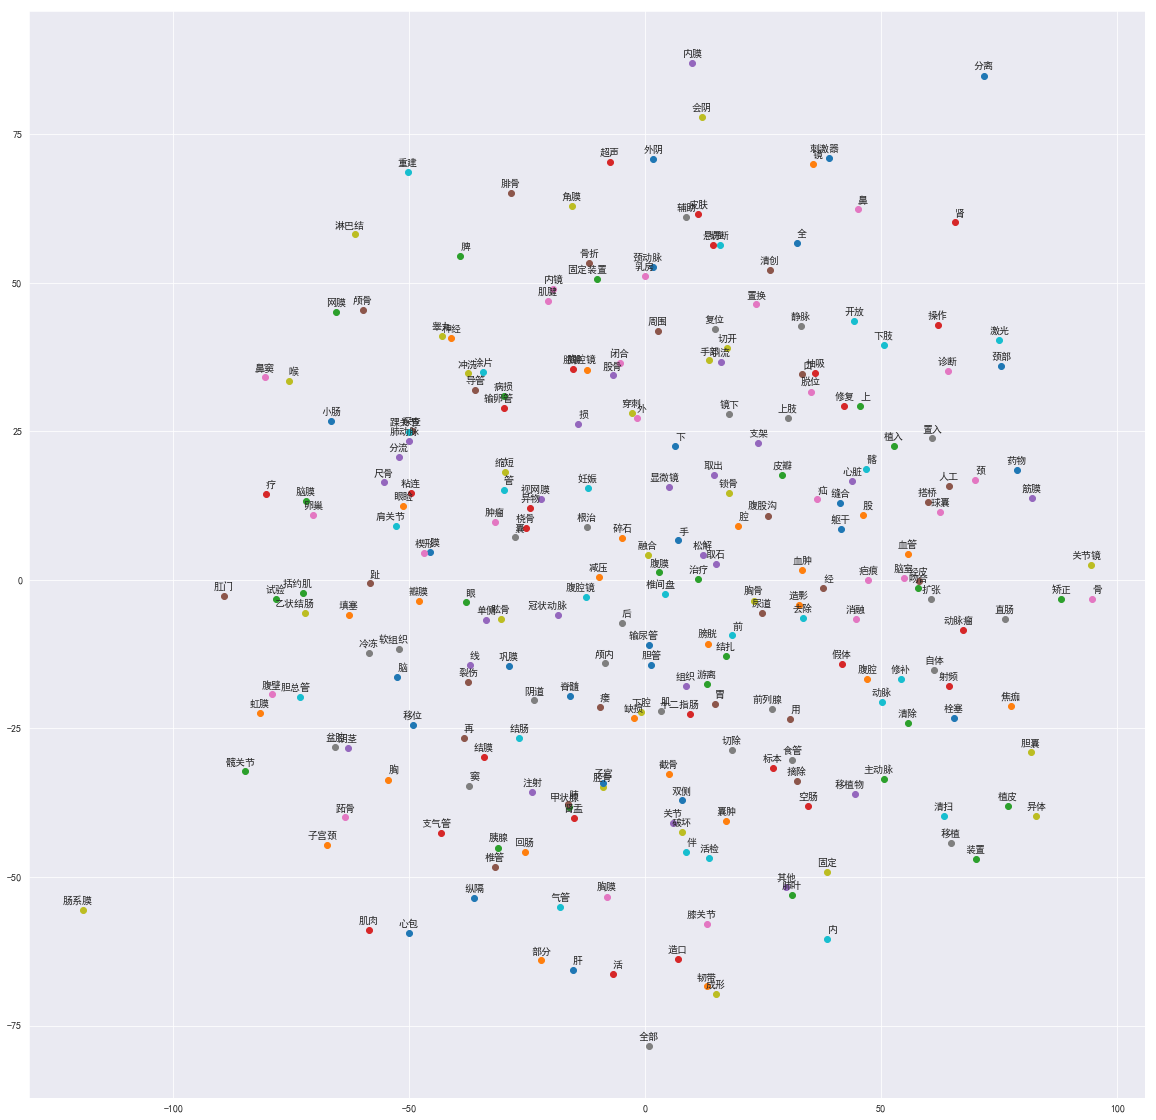

In [20]:
tsne_plot(pic)

In [21]:
freq_count = []

for w in model.wv.vocab:
        freq_count.append([w,model.wv.vocab[w].count])
token_freq = pd.DataFrame(data = freq_count, columns = ['token_name','frequency'])
np.savetxt(r'C:\Users\MYTh_\Desktop\high_freq.txt', token_freq.sort_values(by = ["frequency"],ascending = False), fmt='%s',encoding = 'utf-8')

In [22]:
token_freq.sort_values(by = ["frequency"],ascending = False).head(10)

,token_name,frequency
254,切除,2163
18,下,687
229,切开,667
408,腹腔镜,489
359,修补,486
288,病损,403
69,其他,374
59,内,329
144,成形,315
185,部分,294


In [23]:
hf_writer = pd.ExcelWriter(r'~\Desktop\high_freq.xlsx')
token_freq.sort_values(by = ["frequency"],ascending = False).to_excel(hf_writer,'Sheet1')
hf_writer.save()

In [24]:
vector_list = []

for i in range(len(icd9v3.tokens)):
    
# 不去除高频词下面用这块
#    if (i == 6026):
#        vector_list.append(np.mean(model['苗勒管','囊肿','切除术'], axis = 0))
#        continue
#    if (i == 7317):
#        vector_list.append(np.mean(model['肩峰','切除术'], axis = 0))
#        continue
# 去除高频词下用这块
    if i == 5999:
        vector_list.append(np.mean(model['苗勒管','囊肿','切除'],axis = 0))
        continue
    if i == 7281:
        vector_list.append(np.mean(model['肩峰','切除'], axis = 0))
        continue
    vector_list.append(np.mean(model[list(icd9v3.tokens[i].split(' '))], axis = 0))
    
    

C:\Users\MYTh_\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\MYTh_\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\MYTh_\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [25]:
kmeans = cluster.KMeans(n_clusters = 5000 ,max_iter = 2000)
kmeans.fit(vector_list)

labels= kmeans.predict(vector_list)

In [26]:
# 核对结果长度
#len(labels) == len(icd9v3.tokens)

True

In [32]:
icd9v3["label"] = labels
icd9v3_sorted = icd9v3.sort_values(by = ['label'], ascending = (True))
labeled_icd9 = icd9v3_sorted[['detail_code','detail_name','label']]
labeled_icd9.head()

,detail_code,detail_name,label
9506,91.8501,其他部位标本毒理学检查,0
9505,91.8401,其他部位标本寄生虫检查,0
9503,91.8201,其他部位标本培养,0
7992,81.1801,距下关节关节制动术,1
9703,93.7401,语言缺损训练,2


In [29]:
# 输出
#labeled_icd9.to_excel(r'C:\Users\MYTh_\Desktop\labeled_ICD9-CM3.xlsx', labeled_icd9,encoding = 'utf-8')
writer = pd.ExcelWriter(r'~\Desktop\labeled_ICD9-CM3.xlsx')
labeled_icd9.to_excel(writer,'Sheet1')
writer.save()

In [31]:
#icd9v3[labeled_icd9.label == 99]